<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AALU_Coding/blob/main/generating_image_features_pca_t_sne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
"""import json
from keras.utils.data_utils import get_file
from keras import backend as K

CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'


def preprocess_input(x, dim_ordering='default'):
    if dim_ordering == 'default':
        dim_ordering = K.set_image_data_format('channels_first')
    assert dim_ordering in {'tf', 'th'}

    if dim_ordering == 'th':
        x[:, 0, :, :] -= 103.939
        x[:, 1, :, :] -= 116.779
        x[:, 2, :, :] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, ::-1, :, :]
    else:
        x[:, :, :, 0] -= 103.939
        x[:, :, :, 1] -= 116.779
        x[:, :, :, 2] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, :, :, ::-1]
    return x


def decode_predictions(preds, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects '
                         'a batch of predictions '
                         '(i.e. a 2D array of shape (samples, 1000)). '
                         'Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',
                         CLASS_INDEX_PATH,
                         cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        results.append(result)
    return results"""

"import json\nfrom keras.utils.data_utils import get_file\nfrom keras import backend as K\n\nCLASS_INDEX = None\nCLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'\n\n\ndef preprocess_input(x, dim_ordering='default'):\n    if dim_ordering == 'default':\n        dim_ordering = K.set_image_data_format('channels_first')\n    assert dim_ordering in {'tf', 'th'}\n\n    if dim_ordering == 'th':\n        x[:, 0, :, :] -= 103.939\n        x[:, 1, :, :] -= 116.779\n        x[:, 2, :, :] -= 123.68\n        # 'RGB'->'BGR'\n        x = x[:, ::-1, :, :]\n    else:\n        x[:, :, :, 0] -= 103.939\n        x[:, :, :, 1] -= 116.779\n        x[:, :, :, 2] -= 123.68\n        # 'RGB'->'BGR'\n        x = x[:, :, :, ::-1]\n    return x\n\n\ndef decode_predictions(preds, top=5):\n    global CLASS_INDEX\n    if len(preds.shape) != 2 or preds.shape[1] != 1000:\n        raise ValueError('`decode_predictions` expects '\n                         'a batch o

## Import Packages

In [ ]:
import skimage
import cv2
import os
import numpy as np
from sklearn import manifold, datasets
import pickle as pkl

import keras
from keras.preprocessing import image
from keras.models import Model
from keras.applications.vgg19 import VGG19
from skimage.transform import resize
#import imagenet_utils as imu
from keras.applications import imagenet_utils as imu

import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

In [ ]:
import cv2 as cv
from glob import glob
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

In [ ]:
PATH = '/content/drive/My Drive/phd_thesis_data/deep_city/pix2pix/compiled/combined/thumbnails/h-w/right_half' #@param ['/content/drive/My Drive/aa_images/dataset_04', '/content/drive/My Drive/aa_images/10000_rdm_04_1', '/content/drive/My Drive/aa_images/10000_imgs_fixed_departure_v04'] {allow-input: true}

#images = [cv.imread(file, cv.COLOR_BGR2RGB) for file in glob(PATH + '/*.jpg')]
#print(len(images))

In [ ]:
#@title
"""rootfolder = PATH
file_list = os.listdir(rootfolder)
print(file_list)"""

'rootfolder = PATH\nfile_list = os.listdir(rootfolder)\nprint(file_list)'

In [ ]:
#@title
"""file_list_sorted = file_list.sort()
print(file_list_sorted)"""

'file_list_sorted = file_list.sort()\nprint(file_list_sorted)'

In [ ]:
#@title
"""
#rootfolder = 'D:\\COMPUTER_VISION\\AAPR\\10000_imgs_aa_barrel_vault'
file_list = []
for i in range(len(os.listdir(rootfolder))):
  file_list.append(plt.imread(PATH + str(i+10000) + '.jpg'))

print(file_list)"""

"\n#rootfolder = 'D:\\COMPUTER_VISION\\AAPR\\10000_imgs_aa_barrel_vault'\nfile_list = []\nfor i in range(len(os.listdir(rootfolder))):\n  file_list.append(plt.imread(PATH + str(i+10000) + '.jpg'))\n\nprint(file_list)"

In [ ]:
#np.array(file_list)

## Extract Features with VGG19

In [ ]:
#@title
"""
hulist = []

for i in file_list:
    filepath = os.path.join(rootfolder,i)
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

    moments = cv2.moments(img)
    huMoments = cv2.HuMoments(moments)
    huMoments = np.squeeze(huMoments)
    huMoments = huMoments.tolist()
    hulist.append(huMoments)

humoments_total = np.stack(hulist, axis=0)

rootfolder2 = rootfolder + '_features'
fileName = os.path.join(rootfolder2,'Hu_moments')
fileObject = open(fileName, 'wb')
pkl.dump(humoments_total, fileObject)
fileObject.close()

"""

"\nhulist = []\n\nfor i in file_list:\n    filepath = os.path.join(rootfolder,i)\n    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)\n    \n    moments = cv2.moments(img)\n    huMoments = cv2.HuMoments(moments)\n    huMoments = np.squeeze(huMoments)\n    huMoments = huMoments.tolist()\n    hulist.append(huMoments)\n    \nhumoments_total = np.stack(hulist, axis=0)\n\nrootfolder2 = rootfolder + '_features'\nfileName = os.path.join(rootfolder2,'Hu_moments')\nfileObject = open(fileName, 'wb')\npkl.dump(humoments_total, fileObject)\nfileObject.close()\n\n"

In [ ]:
"""
base_model = VGG19(weights='imagenet')
model_ = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

vgg19_features_list = []

for i in range(0, 10000, 1):
    img = image.load_img(str(PATH + str(i) + '.jpg'), target_size=(224, 224))
    #img = tf.keras.preprocessing.image.load_img(filepath, target_size=(224, 224))
    #print(i)
    plt.imshow(img)
    plt.axis('off')
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model_.predict(x).flatten()
    vgg19_features_list.append(features)
    print(features.shape)
"""

"\nbase_model = VGG19(weights='imagenet')\nmodel_ = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)\n\nvgg19_features_list = []\n\nfor i in range(0, 10000, 1):\n    img = image.load_img(str(PATH + str(i) + '.jpg'), target_size=(224, 224))\n    #img = tf.keras.preprocessing.image.load_img(filepath, target_size=(224, 224))\n    #print(i)\n    plt.imshow(img)\n    plt.axis('off')\n    x = image.img_to_array(img)\n    x = np.expand_dims(x, axis=0)\n    x = preprocess_input(x)\n    features = model_.predict(x).flatten()\n    vgg19_features_list.append(features)\n    print(features.shape)\n"

### Save Model

In [ ]:
"""
from pathlib import Path
vgg19_features = np.stack(vgg19_features_list, axis=0)

# rootfolder2 = Path + '_features'
rootfolder2 = '/content/drive/My Drive/aa_images/10000_rdm_04_1_features/'
fileName = os.path.join(rootfolder2,'vgg19_block5_pool')
fileObject = open(fileName, 'wb')
pkl.dump(vgg19_features, fileObject)
fileObject.close()
"""

"\nfrom pathlib import Path\nvgg19_features = np.stack(vgg19_features_list, axis=0)\n        \n# rootfolder2 = Path + '_features'\nrootfolder2 = '/content/drive/My Drive/aa_images/10000_rdm_04_1_features/'\nfileName = os.path.join(rootfolder2,'vgg19_block5_pool')\nfileObject = open(fileName, 'wb')\npkl.dump(vgg19_features, fileObject)\nfileObject.close()\n"

## Extract Features with PCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition as dp
import imageio
from skimage import io,transform,color
from skimage import img_as_ubyte
#from sklearn.datasets.base import load_iris
from PIL import Image
import cv2 as cv


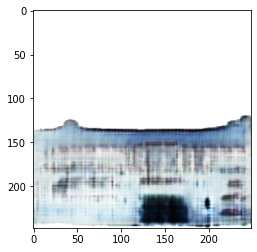

In [ ]:
# Initialize the image stack with the first image
img = cv.imread(PATH + '1.jpg')
plt.imshow(img)

In [ ]:

img_gray = color.rgb2gray(img)

# Set the new size for the image
new_size = (256, 256)

# Resize the image
img_gray = cv2.resize(img_gray, new_size, interpolation=cv2.INTER_AREA)

im_stack = np.asarray(img_gray)

print(str(im_stack) + '__1')


# Concatenate additional images to the stack
for i in range(2, 67):
    img = cv.imread(PATH + str(i) + '.jpg')
    img_gray = color.rgb2gray(img)

    # Set the new size for the image
    new_size = (256, 256)

    # Resize the image
    img_gray = cv2.resize(img_gray, new_size, interpolation=cv2.INTER_AREA)

    im_array = np.asarray(img_gray)
    im_stack = np.append(im_stack, im_array)
    print(str(im_stack) + '__' + str(i))
    print(len(im_stack))

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]__1
[1. 1. 1. ... 1. 1. 1.]__2
131072
[1.         1.         1.         ... 1.         1.00000003 1.        ]__3
196608
[1.         1.         1.         ... 0.99999999 0.99999999 1.        ]__4
262144
[1.         1.         1.         ... 1.         1.00000003 1.        ]__5
327680
[1.         1.         1.         ... 0.99999999 0.99999999 1.        ]__6
393216
[1.         1.         1.         ... 1.00000001 0.99999997 1.        ]__7
458752
[1.         1.         1.         ... 1.00000001 1.         1.        ]__8
524288
[1.         1.         1.         ... 1.         1.00000003 1.        ]__9
589824
[1.         1.         1.         ... 1.00000001 1.00000001 1.        ]__10
655360
[1.         1.         1.         ... 0.99999999 0.99999999 1.        ]__11
720896
[1.         1.         1.         ... 1.         1.00000003 1.     

In [ ]:
# PCA algorithm
def PCA(matrix):
    #matrix = matrix.reshape(-1, 1)
    matrix = np.split(matrix, 66)
    #print(matrix)
    num_comp = 3 #@param{type:'slider', min:0, max:100, step:1}

    pca = dp.PCA(n_components = num_comp) # load the PCA algorithm, set the principal component after dimensionality reduction to n_components
    pca_features = pca.fit_transform(matrix) # dimensionality reduction on raw data
    print(pca_features[0])
    print(pca_features[1])

    for i in range(66):
        print(pca_features[i])

    return pca_features


#print(img_gray)
low_matrix = PCA(im_stack)

[-29.35617644 -15.74923843 -20.90635392]
[-19.18132257  14.30320978 -21.15728127]
[-29.35617644 -15.74923843 -20.90635392]
[-19.18132257  14.30320978 -21.15728127]
[ 36.14507298  34.79141486 -30.23044002]
[ 55.34087397 -12.8316252    6.8591336 ]
[-30.35971082 -19.62750217 -15.92841054]
[-18.43629592 -11.28852227   8.66899421]
[-15.34127859  -5.28149954  16.88657717]
[-21.55943353  11.11124876 -16.36583642]
[ 30.22214814  32.35867087 -25.69765117]
[ 48.91559177 -42.73780304 -13.26151979]
[-29.73424217 -17.7699756  -12.7918093 ]
[-10.9085942    4.24936823  16.04139549]
[-14.51183541  -1.78112518  18.26643449]
[-12.79342463  23.18162016  -6.00761638]
[ 19.82832314  40.21916506 -11.81207152]
[ 58.4108257  -37.07609398  -3.52520647]
[-34.49217747 -30.48775608 -20.47151404]
[-5.16041735  7.37350817 25.96716426]
[-15.53201947   0.79539123  16.85893686]
[-15.62441559  17.63172741  -3.48539244]
[17.9244095  37.94175194 -9.77751022]
[ 52.64915264 -27.84040434  -1.01021378]
[-34.35319253 -29.2813

'\n#print(low_matrix)#输出PCA之后的矩阵\nend_matrix = low_matrix * 255\nend_img = matrix_image(end_matrix)#乘255之后的结果转为图片\nend_img.show()#显示PCA之后的图片'

//

## T-SNE

In [ ]:
import pickle as pkl
import numpy as np
import os
from sklearn import manifold, datasets
import time


_n_dim = 3
_perplexity = 10
_learning_rate = 100
_scale = 1

tsne = manifold.TSNE(n_components=_n_dim, init='pca', random_state=0, perplexity=int(_perplexity), learning_rate=int(_learning_rate))
X_tsne = tsne.fit_transform(low_matrix) # Fit X into an embedded space and return that transformed output.
X_tsne  = X_tsne *_scale
output = X_tsne.tolist()
time=time.time()

for i in range(66):
    print(output[i])


[35.219757080078125, 59.58084487915039, 85.8115463256836]
[51.45535659790039, 76.86404418945312, -97.57525634765625]
[113.80073547363281, -53.898624420166016, -16.548208236694336]
[-60.17631149291992, 73.6605453491211, 44.94227981567383]
[29.34829330444336, 0.7601166367530823, 55.275840759277344]
[-36.299129486083984, 20.541515350341797, 6.460191249847412]
[16.5083065032959, 48.21778869628906, -152.50454711914062]
[69.24662780761719, 109.83576965332031, -78.208251953125]
[116.9090347290039, -72.19258117675781, 22.17110824584961]
[-47.13555145263672, -145.70831298828125, -60.13478469848633]
[23.47772979736328, 42.611289978027344, 38.93659210205078]
[13.42418098449707, -53.34304428100586, -44.092864990234375]
[-43.992218017578125, -57.80574417114258, -35.017154693603516]
[46.4549446105957, 20.552291870117188, -97.86701202392578]
[55.7437858581543, -109.4963607788086, 39.44591522216797]
[-77.44633483886719, 124.5338363647461, 89.08661651611328]
[76.56156158447266, -0.42525312304496765, 22

### Save CSV

In [ ]:
# Convert the list to an array
my_array = np.array(output)

# Save the array as a CSV file
f_name = 'latent_space_mix' #@param{type:'string'}
np.savetxt(f_name + '.csv', my_array, delimiter=',')

### Save Model

In [ ]:
"""
from pathlib import Path
features = np.stack(low_matrix, axis=0)

# rootfolder2 = Path + '_features'
rootfolder2 = '/content/drive/My Drive/'
fileName = os.path.join(rootfolder2,'pca_pool')
fileObject = open(fileName, 'wb')
pkl.dump(features, fileObject)
fileObject.close()
"""